In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
quantmodelDir = '/users/hgmartin/libraries/quantmodel'

%matplotlib inline

import sys, os
pythonPath = quantmodelDir+"/code/core"
if pythonPath not in sys.path:
    sys.path.append(pythonPath)
os.environ["QUANTMODELPATH"] = quantmodelDir

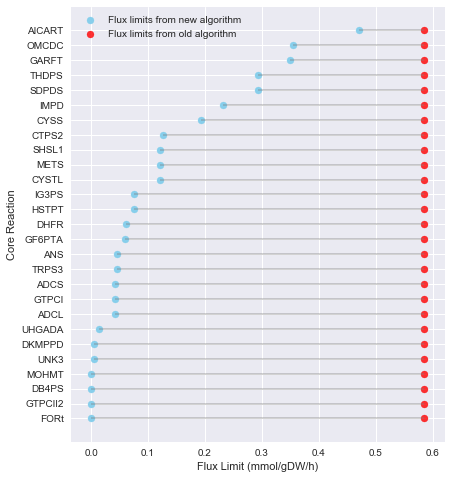

In [4]:
# Load the dataframe
df = pd.read_csv('test_data/lf2cfig2-v2.csv', sep=',', names= ['Reactions', 'New Flux','Old Flux'])

# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='New Flux')
my_range=range(1,len(df.index)+1)
 
# Initialize BIG figure
fig = plt.figure(1, [6.7, 8])    
ax = fig.add_subplot(111)

# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['New Flux'], xmax=(ordered_df['Old Flux']), color='grey', alpha=0.4)
plt.scatter(ordered_df['New Flux'], my_range, color='skyblue', alpha=1, label='Flux limits from new algorithm')
plt.scatter((ordered_df['Old Flux']), my_range, color='red', alpha=0.8 , label='Flux limits from old algorithm')

plt.legend()
plt.yticks(my_range, ordered_df['Reactions'])
plt.xlabel('Flux Limit (mmol/gDW/h)')
plt.ylabel('Boundary Reaction')
plt.savefig("fig1-v6.pdf", bbox_inches='tight')